# Dual Multiple Factor Analysis (DMFA) - Iris dataset

In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings("ignore")
#activation des tables interactifs
from itables import init_notebook_mode
init_notebook_mode(all_interactive=True)

<IPython.core.display.Javascript object>

In [2]:
#chargement des données iris
import seaborn as sns 
iris = sns.load_dataset('iris')
iris

sepal_length  sepal_width  petal_length  petal_width    species
0             5.1          3.5           1.4          0.2     setosa
1             4.9          3.0           1.4          0.2     setosa
2             4.7          3.2           1.3          0.2     setosa
3             4.6          3.1           1.5          0.2     setosa
4             5.0          3.6           1.4          0.2     setosa
..            ...          ...           ...          ...        ...
145           6.7          3.0           5.2          2.3  virginica
146           6.3          2.5           5.0          1.9  virginica
147           6.5          3.0           5.2          2.0  virginica
148           6.2          3.4           5.4          2.3  virginica
149           5.9          3.0           5.1          1.8  virginica

[150 rows x 5 columns]

In [3]:
from scientisttools.dmfa import DMFA 
res_dmfa = DMFA(num_fact=4,standardize=True)
res_dmfa.fit(iris)

DMFA(num_fact=4)

## Eigenvalues

In [4]:
#eigenvalues
from scientisttools import get_eig
get_eig(res_dmfa)

eigenvalue  difference  proportion  cumulative
Dim.1    2.459553    1.801064   61.488826   61.488826
Dim.2    0.658489    0.046846   16.462218   77.951044
Dim.3    0.611643    0.341328   15.291074   93.242118
Dim.4    0.270315         NaN    6.757882  100.000000

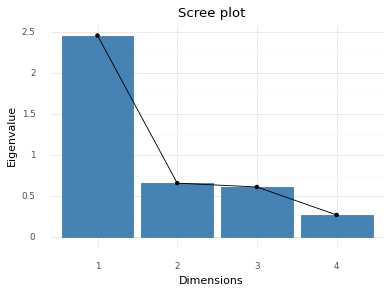

In [5]:
#scree plot
from scientisttools import fviz_screeplot
p = fviz_screeplot(res_dmfa,choice="eigenvalue")
print(p)

## Individuals informations

In [6]:
#individuals informations
from scientisttools import get_dmfa_ind
ind = get_dmfa_ind(res_dmfa)
ind._fields

('coord', 'cos2', 'contrib', 'infos')

### Individuals factor coordinates

In [7]:
#individuals factor coordinates
ind.coord

Dim.1     Dim.2     Dim.3     Dim.4
0   -0.150332 -0.261811 -0.566467 -0.147726
1   -1.112421 -0.325170  0.496685 -0.357368
2   -1.450024  0.329737 -0.071037 -0.064595
3   -1.140988 -0.056344  0.811214  0.630801
4   -0.170945 -0.049139 -0.692230  0.155044
..        ...       ...       ...       ...
145  0.273412  0.918570 -0.041886 -0.740735
146 -1.705414 -0.098611  0.410309 -0.750142
147 -0.406617  0.275867 -0.415718 -0.190139
148  0.656688  1.498296 -0.553932  0.520033
149 -1.346864  0.289193 -0.603924  0.560485

[150 rows x 4 columns]

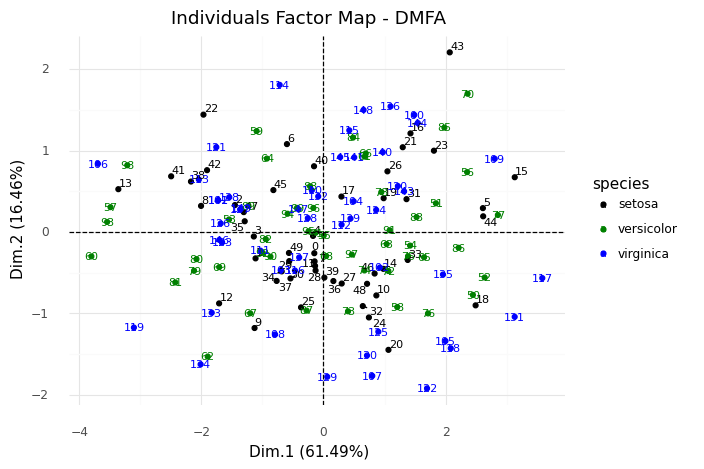

In [8]:
#individuals factor map - DMFA
from scientisttools import fviz_dmfa_ind
p = fviz_dmfa_ind(res_dmfa,repel=True)
print(p)

### Individuals square cosinus

In [9]:
#individuals square cosinus
ind.cos2

Dim.1     Dim.2     Dim.3     Dim.4
0    0.052091  0.157992  0.739617  0.050301
1    0.720461  0.061559  0.143626  0.074354
2    0.946884  0.048965  0.002273  0.001879
3    0.551398  0.001345  0.278724  0.168534
4    0.054636  0.004514  0.895906  0.044944
..        ...       ...       ...       ...
145  0.050889  0.574397  0.001194  0.373519
146  0.797001  0.002665  0.046134  0.154201
147  0.367078  0.168962  0.383695  0.080266
148  0.132550  0.690013  0.094314  0.083123
149  0.704060  0.032459  0.141556  0.121925

[150 rows x 4 columns]

No module named 'seaborn._oldcore'


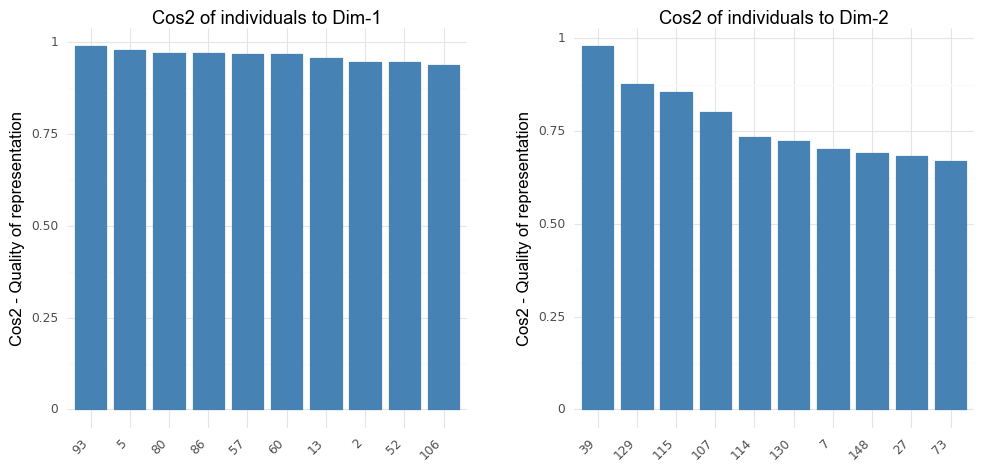

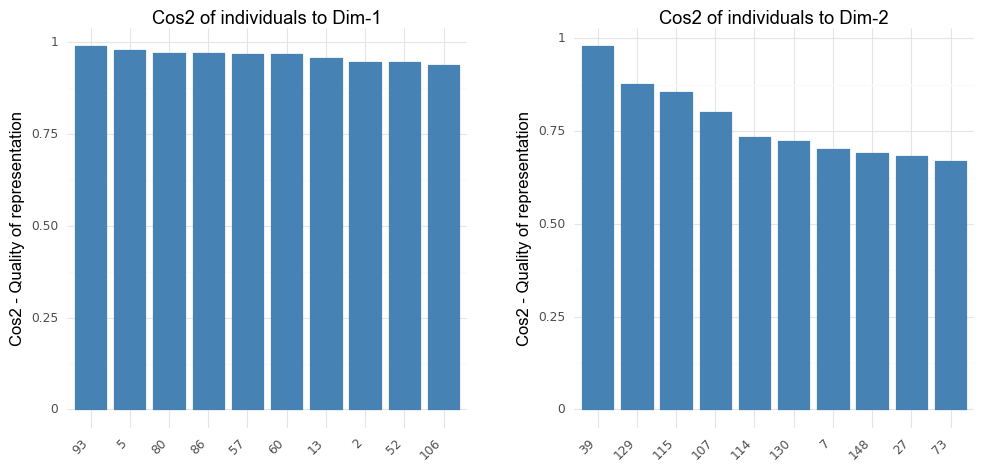

In [10]:
#order individuals by square cosinus
import patchworklib as pw
from scientisttools import fviz_cos2
p1, p2 = fviz_cos2(res_dmfa,choice="ind",axis=0,top_cos2=10), fviz_cos2(res_dmfa,choice="ind",axis=1,top_cos2=10)
g1, g2 = pw.load_ggplot(p1, figsize=(4,4)), pw.load_ggplot(p2, figsize=(4,4))
(g1|g2).savefig()

### Individuals contributions

In [11]:
#individuals contributions
ind.contrib

Dim.1     Dim.2     Dim.3     Dim.4
0    0.006126  0.069396  0.349752  0.053821
1    0.335421  0.107049  0.268889  0.314970
2    0.569905  0.110077  0.005500  0.010290
3    0.352870  0.003214  0.717269  0.981348
4    0.007921  0.002445  0.522289  0.059285
..        ...       ...       ...       ...
145  0.020262  0.854249  0.001912  1.353204
146  0.788337  0.009845  0.183499  1.387793
147  0.044815  0.077048  0.188369  0.089162
148  0.116888  2.272770  0.334444  0.666959
149  0.491700  0.084671  0.397536  0.774759

[150 rows x 4 columns]

## Variables informations

In [12]:
#variables informations
from scientisttools import get_dmfa_var
var = get_dmfa_var(res_dmfa,choice="quanti_var")
var._fields

('coord', 'cor', 'cos2', 'contrib', 'infos')

### Variables factor coordinates

In [13]:
#variables factor coordinates
var.coord

Dim.1     Dim.2     Dim.3     Dim.4
sepal_length  0.832727 -0.404518 -0.169331 -0.338021
sepal_width   0.774196  0.212593 -0.551183  0.227205
petal_length  0.799087 -0.320256  0.425136  0.279563
petal_width   0.726774  0.589147  0.313729 -0.162109

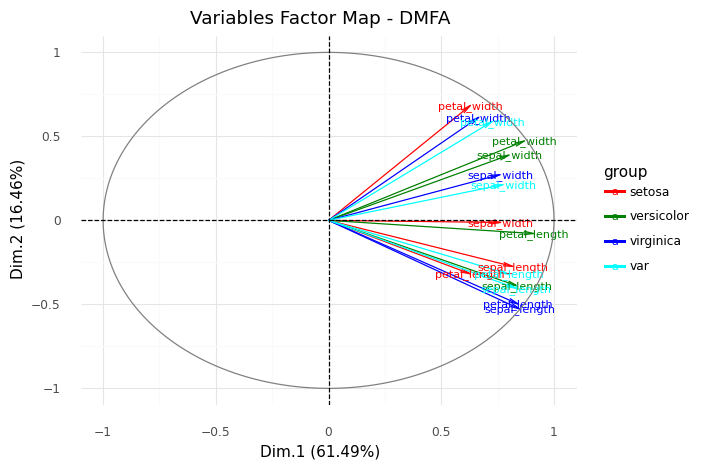

In [14]:
#variables factor map
from scientisttools import fviz_dmfa_var
p = fviz_dmfa_var(res_dmfa)
print(p)

### Variables square cosinus

In [15]:
#variables square cosinus
var.cos2

Dim.1     Dim.2     Dim.3     Dim.4
sepal_length  0.693434  0.163635  0.028673  0.114258
sepal_width   0.599379  0.045196  0.303803  0.051622
petal_length  0.638540  0.102564  0.180741  0.078155
petal_width   0.528200  0.347094  0.098426  0.026279

### Variables contributions

In [16]:
#variables contributions
var.contrib

Dim.1      Dim.2      Dim.3      Dim.4
sepal_length  28.193484  24.850039   4.687890  42.268586
sepal_width   24.369427   6.863548  49.670032  19.096994
petal_length  25.961624  15.575658  29.550044  28.912674
petal_width   21.475465  52.710755  16.092034   9.721746

## Group informations

In [17]:
#group informations
group = get_dmfa_var(res_dmfa)
group._fields

('name', 'coord', 'coord_n', 'cos2')

### Group name

In [18]:
#group name
group.name

['setosa', 'versicolor', 'virginica']

### Group factor coordinates

In [19]:
#group factor coordinates
group.coord

Dim.1     Dim.2     Dim.3     Dim.4
setosa      2.023192  0.571627  0.992284  0.412897
versicolor  2.909916  0.449654  0.426230  0.214200
virginica   2.445552  0.954185  0.416414  0.183849

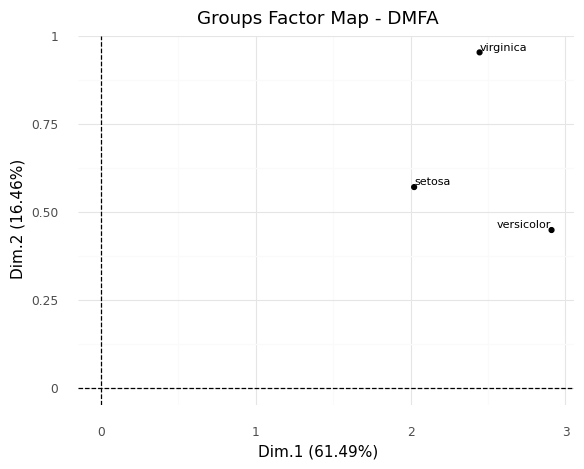

In [20]:
from scientisttools import fviz_dmfa_group
p = fviz_dmfa_group(res_dmfa,repel=True)
print(p)

### Group normalized coordinates

In [21]:
#group normalized factor coordinates
group.coord_n

Dim.1     Dim.2     Dim.3     Dim.4
setosa      0.982828  0.277686  0.482033  0.200578
versicolor  0.994387  0.153658  0.145653  0.073197
virginica   0.996258  0.388712  0.169637  0.074896

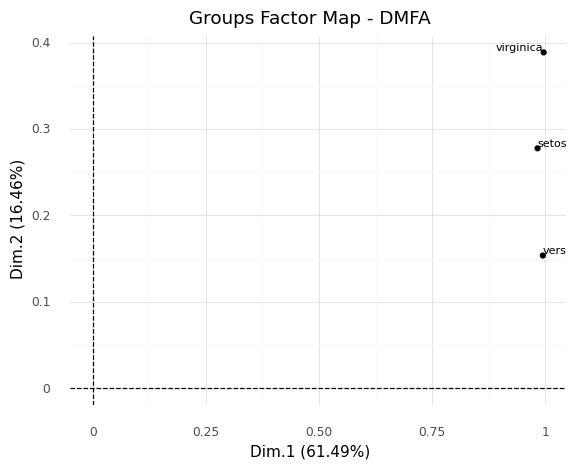

In [22]:
p = fviz_dmfa_group(res_dmfa,choice="normalized",repel=True)
print(p)

### Group square cosinus

In [23]:
#group square cosinus
group.cos2

Dim.1     Dim.2     Dim.3     Dim.4
setosa      0.706759  0.056419  0.170008  0.029436
versicolor  0.937156  0.022377  0.020107  0.005078
virginica   0.833270  0.126852  0.024159  0.004709

## Partial coordinate of the variables for each group

In [24]:
#partiel coordinate of the variables for each group
var_partiel = get_dmfa_var(res_dmfa,choice="var_partiel")
var_partiel.setosa

Dim.1     Dim.2     Dim.3     Dim.4
sepal_length  0.817318 -0.274451 -0.484919 -0.418161
sepal_width   0.763737 -0.012330 -0.678198 -0.035454
petal_length  0.627672 -0.318125  0.495462  0.526411
petal_width   0.629190  0.684451  0.358560 -0.330810

In [25]:
var_partiel.versicolor

Dim.1     Dim.2     Dim.3     Dim.4
sepal_length  0.837144 -0.390073  0.064258 -0.400263
sepal_width   0.800897  0.388748 -0.379215  0.409333
petal_length  0.909323 -0.078391  0.460844  0.101840
petal_width   0.868886  0.472890  0.371437  0.099583

In [26]:
var_partiel.virginica

Dim.1     Dim.2     Dim.3     Dim.4
sepal_length  0.848753 -0.527932  0.067879 -0.170915
sepal_width   0.760932  0.272498 -0.573453  0.437802
petal_length  0.841305 -0.498094  0.314660  0.118150
petal_width   0.666475  0.613870  0.211387 -0.201435

## Summary 

In [27]:
#summary of informations
from scientisttools import summaryDMFA
summaryDMFA(res_dmfa)

                     Dual Multiple Factor Analysis - Results                     

Importance of components
                          Dim.1   Dim.2   Dim.3    Dim.4
Variance                  2.460   0.658   0.612    0.270
Difference                1.801   0.047   0.341      NaN
% of var.                61.489  16.462  15.291    6.758
Cumulative of % of var.  61.489  77.951  93.242  100.000

Groups

            Dim.1  coord_n.1   cos2  Dim.2  coord_n.2   cos2  Dim.3  \
setosa      2.023      0.983  0.707  0.572      0.278  0.056  0.992   
versicolor  2.910      0.994  0.937  0.450      0.154  0.022  0.426   
virginica   2.446      0.996  0.833  0.954      0.389  0.127  0.416   

            coord_n.3   cos2  
setosa          0.482  0.170  
versicolor      0.146  0.020  
virginica       0.170  0.024  

Individuals (the 10 first)

   Weight  Sq. Dist.  Inertia  % Inertia  Dim.1    ctr   cos2  Dim.2    ctr  \
0   0.007      0.434    0.003      0.072 -0.150  0.006  0.052 -0.262  0.069   
1 